In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from hctmicrobiomemskcc.dataloading import dataloading

In [2]:
dfs = dataloading.load_all_data(local_dir='/Users/granthussey/Lab/Schluter/Archive/data/')

Now loading dataset 1/10: blood.
Attempting to load data locally...
Data sucessfully loaded.

Now loading dataset 2/10: metadata.
Attempting to load data locally...
Data sucessfully loaded.

Now loading dataset 3/10: vana.
Attempting to load data locally...
Data sucessfully loaded.

Now loading dataset 4/10: temperature.
Attempting to load data locally...
Data sucessfully loaded.

Now loading dataset 5/10: qpcr.
Attempting to load data locally...
Data sucessfully loaded.

Now loading dataset 6/10: infection.
Attempting to load data locally...
Data sucessfully loaded.

Now loading dataset 7/10: drugs.
Attempting to load data locally...
Data sucessfully loaded.

Now loading dataset 8/10: counts.
Attempting to load data locally...
Data sucessfully loaded.

Now loading dataset 9/10: samples.
Attempting to load data locally...
Data sucessfully loaded.

Now loading dataset 10/10: taxonomy.
Attempting to load data locally...
Data sucessfully loaded.
Phylum
Class
Order
Family
Genus
removing ro

In [3]:
dfs.keys()

dict_keys(['blood', 'metadata', 'vana', 'temperature', 'qpcr', 'infection', 'drugs', 'counts', 'samples', 'taxonomy', 'taxonomy_meta'])

In [381]:
tax = dfs['taxonomy_meta'][['HexColor', 'ColorOrder']].join(dfs['taxonomy'])
tax = tax.dropna()
tax['PFG'] = tax['Phylum'] + ' ' + tax['Family'] + ' ' + tax['Genus']

tax

,HexColor,ColorOrder,Kingdom,Phylum,Class,Order,Family,Genus,PFG
ASV,,,,,,,,,
ASV_1,#1635A4,163,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Firmicutes Lactobacillaceae Lactobacillus
ASV_10,#AD998C,7,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Blautia,Firmicutes Lachnospiraceae Blautia
ASV_100,#16DDD3,44,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroidetes Bacteroidaceae Bacteroides
ASV_1000,#BEA89A,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Peptostreptococcaceae,Romboutsia,Firmicutes Peptostreptococcaceae Romboutsia
ASV_10000,#BEA89A,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Family_Lachnospiraceae_of_unknown_Genus____ASV...,Firmicutes Lachnospiraceae Family_Lachnospirac...
...,...,...,...,...,...,...,...,...,...
ASV_9992,#FBA22E,84,Bacteria,Firmicutes,Erysipelotrichia,Erysipelotrichales,Erysipelotrichaceae,Erysipelatoclostridium,Firmicutes Erysipelotrichaceae Erysipelatoclos...
ASV_9994,#BEA89A,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Blautia,Firmicutes Lachnospiraceae Blautia
ASV_9996,#BEA89A,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,[Ruminococcus] torques group,Firmicutes Lachnospiraceae [Ruminococcus] torq...


# Method

1. Match by genus.
2. Match by family.
3. Match by phylum.

There are _multiple_ HexColor per each of these groups, so I need to go in and manually _tweak_ these.

FIRST: Let's go HexColor by HexColor, looking at the color, and seeing what it is a part of to get an idea.

In [ ]:
print()

# How many genuses have multiple HexColors?

In [326]:
def see_if_dup_hexcolor(taxa, tax):
    tax_no_unk = tax[tax[taxa].apply(lambda v: False if "unknown" in v else True)]
    tax_no_unk = tax_no_unk.drop_duplicates(subset=['PFG', 'HexColor'])
    
    more_than_1_hexcolor = (tax_no_unk.groupby(taxa)['HexColor'].size() > 1).index[tax_no_unk.groupby(taxa)['HexColor'].size() > 1]
    only_1_hexcolor = (tax_no_unk.groupby(taxa)['HexColor'].size() == 1).index[tax_no_unk.groupby(taxa)['HexColor'].size() == 1]
    
    more_than_1 = len(more_than_1_hexcolor)
    only_1 = len(only_1_hexcolor)
    
    print('For {}'.format(taxa))
    print('Duplicate HexColors: {}'.format(more_than_1))
    print('Single HexColors: {}'.format(only_1))
    print()
    
    return more_than_1_hexcolor, only_1_hexcolor

In [327]:
_ = see_if_dup_hexcolor('Phylum', tax)
_ = see_if_dup_hexcolor('Family', tax)
_ = see_if_dup_hexcolor('PFG', tax)

For Phylum
Duplicate HexColors: 19
Single HexColors: 1

For Family
Duplicate HexColors: 69
Single HexColors: 48

For PFG
Duplicate HexColors: 50
Single HexColors: 360



# Going HexColor by HexColor

In [251]:
def taxa_per_color(hexcolor, taxa, tax):
    grouped = tax[tax["HexColor"] == hexcolor].groupby(taxa).size()

    grouped_no_unknowns = grouped.reset_index()[
        grouped.reset_index()[taxa].apply(lambda v: False if "unknown" in v else True)
    ][taxa].values

    return grouped_no_unknowns

In [107]:
taxa_per_color('#1CF8EC', 'PFG')

array(['Bacteroidetes Bacteroidaceae Bacteroides',
       'Bacteroidetes Bacteroidales Incertae Sedis Phocaeicola',
       'Bacteroidetes Barnesiellaceae Barnesiella',
       'Bacteroidetes Barnesiellaceae Coprobacter',
       'Bacteroidetes Chitinophagaceae Hydrotalea',
       'Bacteroidetes Chitinophagaceae Lacibacter',
       'Bacteroidetes Dysgonomonadaceae Dysgonomonas',
       'Bacteroidetes Flavobacteriaceae Capnocytophaga',
       'Bacteroidetes Flavobacteriaceae Flavobacterium',
       'Bacteroidetes Marinifilaceae Butyricimonas',
       'Bacteroidetes Marinifilaceae Odoribacter',
       'Bacteroidetes Muribaculaceae CAG-873',
       'Bacteroidetes Muribaculaceae Genus gut metagenome',
       'Bacteroidetes Muribaculaceae Genus mouse gut metagenome',
       'Bacteroidetes Muribaculaceae Muribaculum',
       'Bacteroidetes Muribaculaceae metagenome',
       'Bacteroidetes Paludibacteraceae F0058',
       'Bacteroidetes Porphyromonadaceae Porphyromonas',
       'Bacteroidetes Pr

In [97]:
unique_hexcolors = tax.sort_values(by='Genus')['HexColor'].unique()
unique_hexcolors

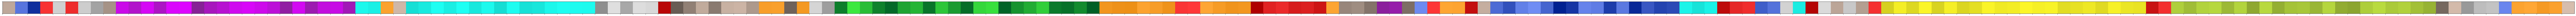

In [98]:
sns.palplot(unique_hexcolors)

/Users/granthussey/miniconda3/envs/prob/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


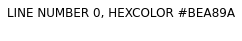

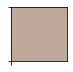

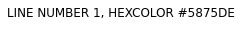

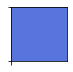

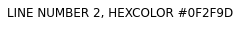

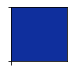

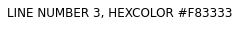

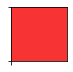

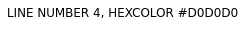

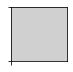

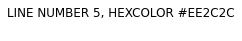

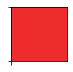

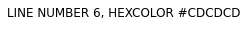

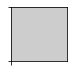

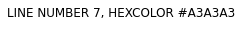

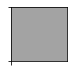

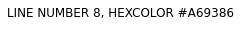

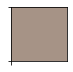

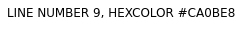

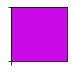

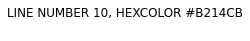

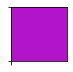

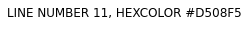

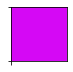

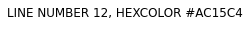

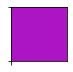

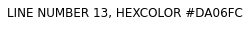

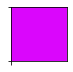

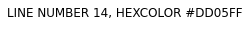

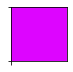

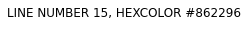

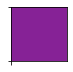

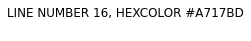

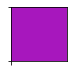

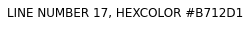

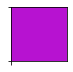

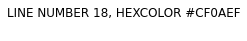

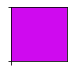

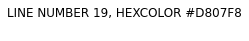

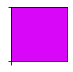

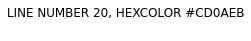

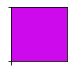

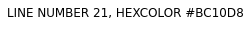

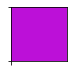

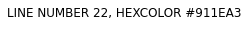

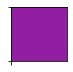

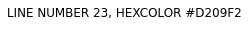

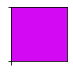

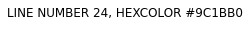

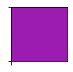

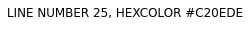

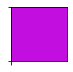

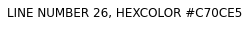

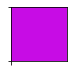

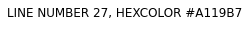

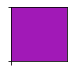

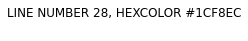

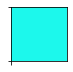

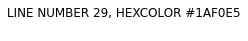

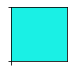

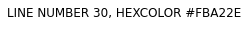

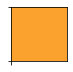

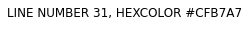

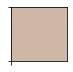

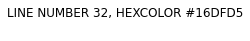

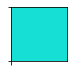

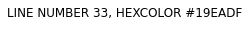

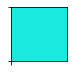

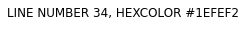

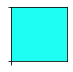

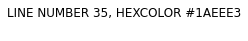

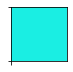

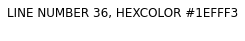

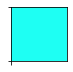

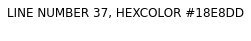

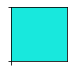

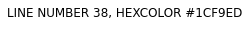

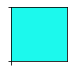

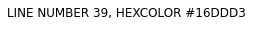

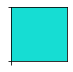

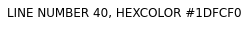

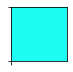

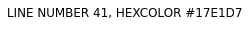

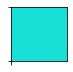

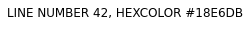

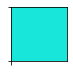

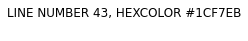

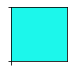

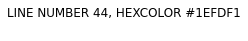

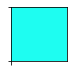

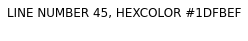

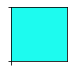

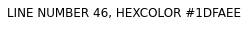

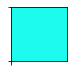

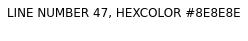

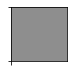

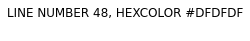

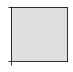

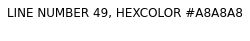

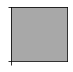

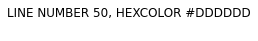

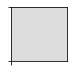

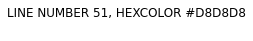

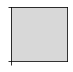

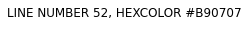

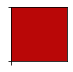

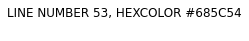

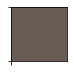

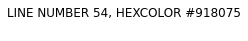

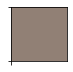

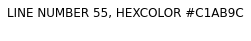

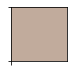

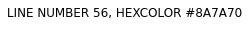

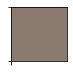

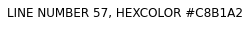

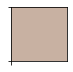

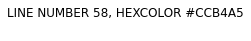

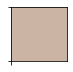

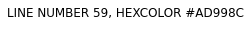

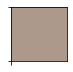

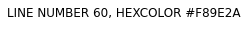

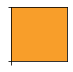

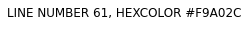

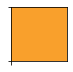

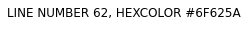

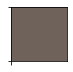

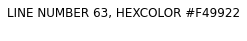

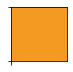

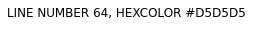

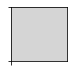

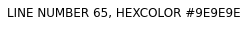

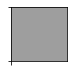

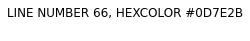

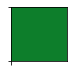

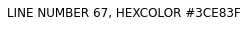

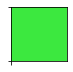

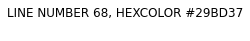

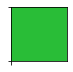

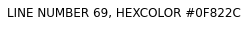

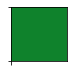

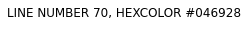

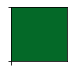

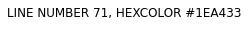

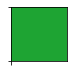

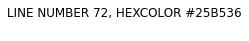

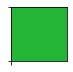

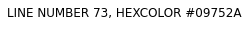

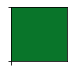

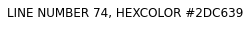

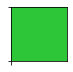

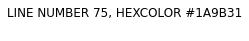

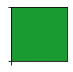

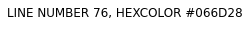

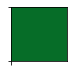

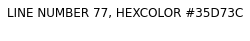

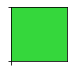

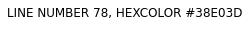

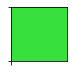

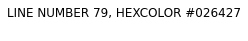

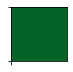

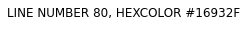

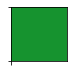

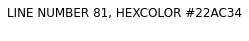

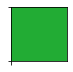

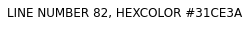

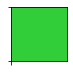

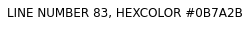

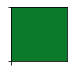

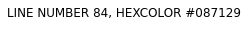

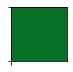

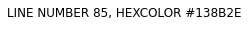

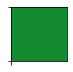

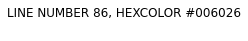

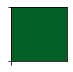

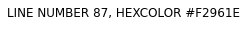

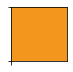

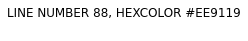

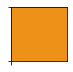

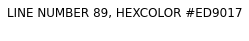

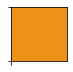

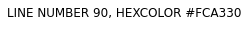

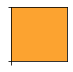

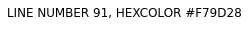

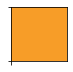

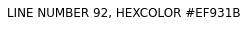

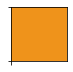

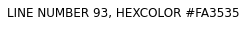

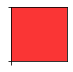

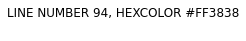

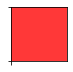

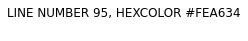

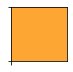

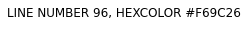

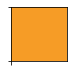

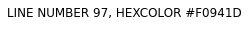

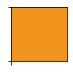

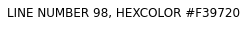

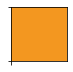

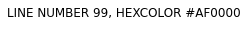

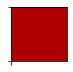

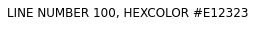

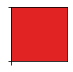

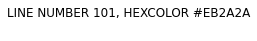

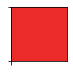

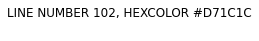

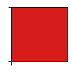

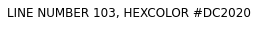

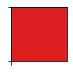

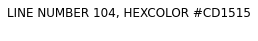

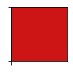

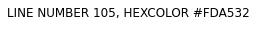

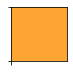

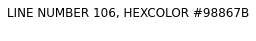

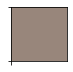

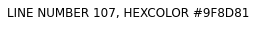

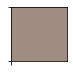

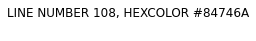

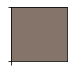

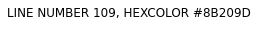

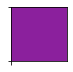

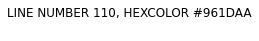

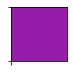

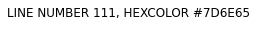

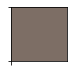

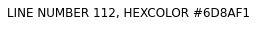

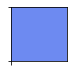

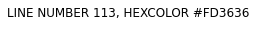

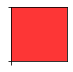

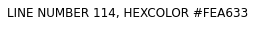

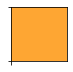

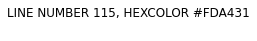

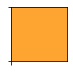

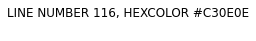

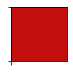

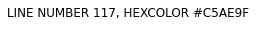

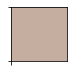

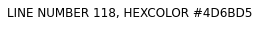

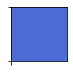

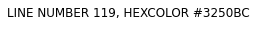

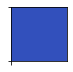

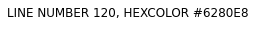

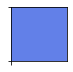

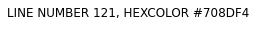

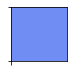

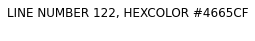

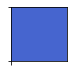

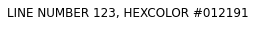

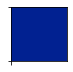

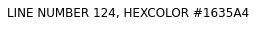

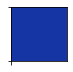

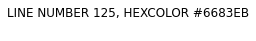

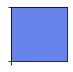

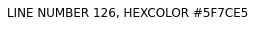

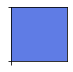

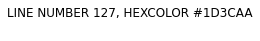

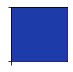

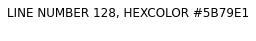

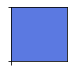

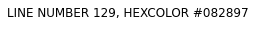

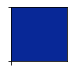

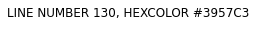

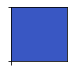

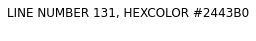

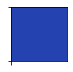

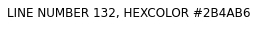

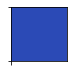

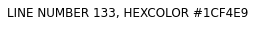

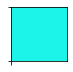

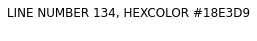

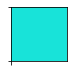

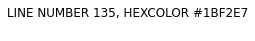

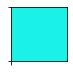

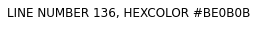

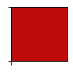

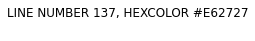

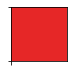

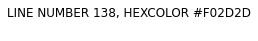

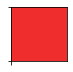

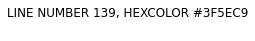

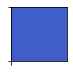

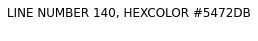

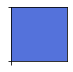

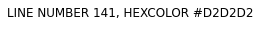

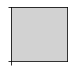

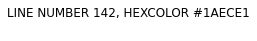

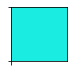

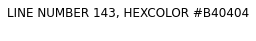

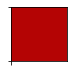

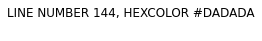

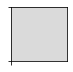

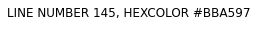

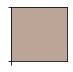

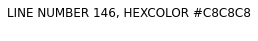

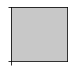

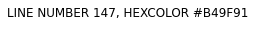

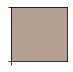

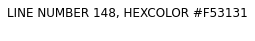

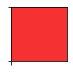

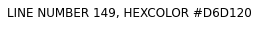

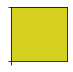

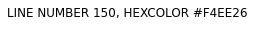

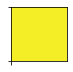

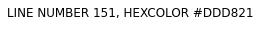

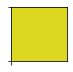

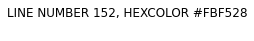

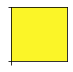

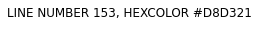

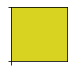

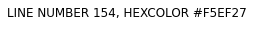

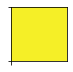

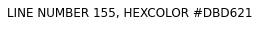

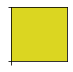

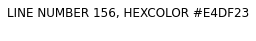

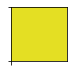

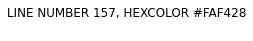

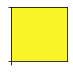

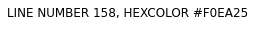

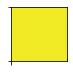

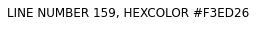

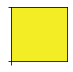

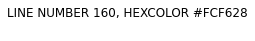

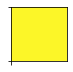

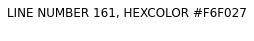

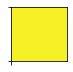

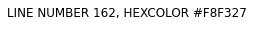

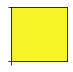

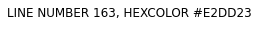

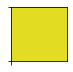

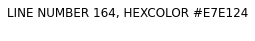

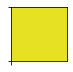

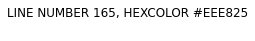

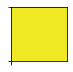

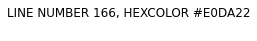

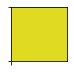

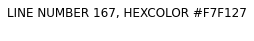

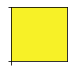

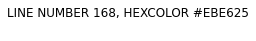

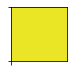

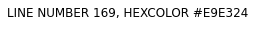

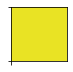

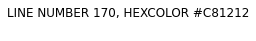

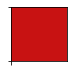

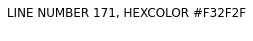

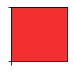

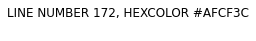

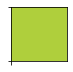

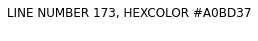

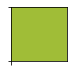

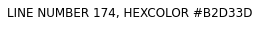

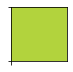

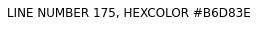

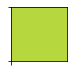

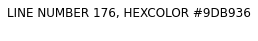

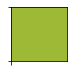

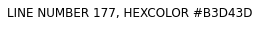

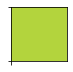

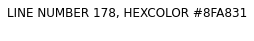

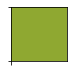

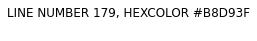

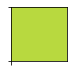

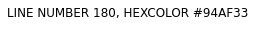

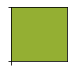

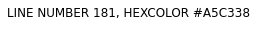

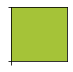

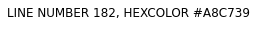

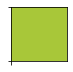

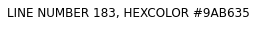

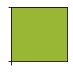

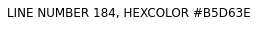

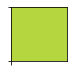

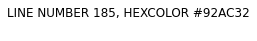

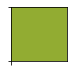

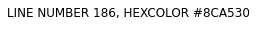

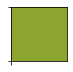

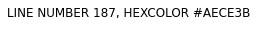

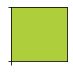

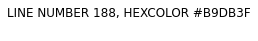

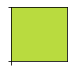

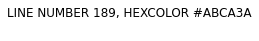

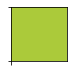

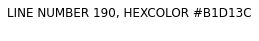

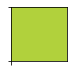

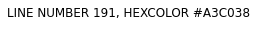

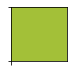

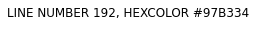

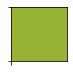

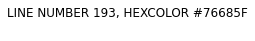

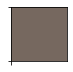

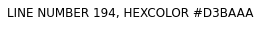

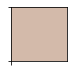

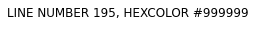

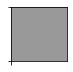

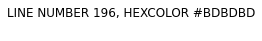

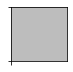

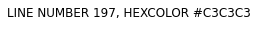

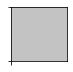

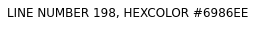

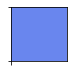

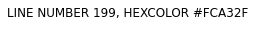

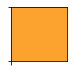

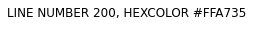

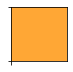

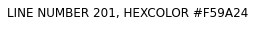

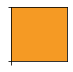

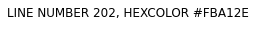

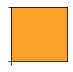

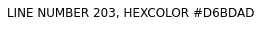

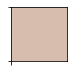

In [201]:
names = []

taxa = "PFG"
for i, color in enumerate(unique_hexcolors):
    fig, ax = plt.subplots(figsize=(0.2, 0.2))
    plt.axis("off")
    plt.title('LINE NUMBER {}, HEXCOLOR {}'.format(i, color))
    names.append(taxa_per_color(color, taxa))
    sns.palplot([color])
    fig, ax = plt.subplots(figsize=(0.2, .8))
    plt.axis("off")



In [121]:
with open('names.txt', 'w') as f:
    for i, item in enumerate(names):
        f.write('LINE NUMBER {}\n'.format(i))
        f.write("%s\n" % item)
        f.write("="*80)
        f.write('\n'*3)

In [213]:
recolor = {
    "BROWN": [31, 55, 57, 58, 117, 145, 147, 194, 203],
    "DARK BROWN": [0, 8, 53, 54, 56, 59, 62, 106, 107, 108, 111, 193],
    "BLUE": [1, 112, 118, 120, 121, 122, 125, 126, 128, 130, 139, 140, 198,],
    "DARK BLUE": [2, 119, 123, 124, 127, 129, 131, 132],
    "RED": [3, 5, 93, 94, 100, 101, 113, 137, 138, 148, 171],
    "DARK RED": [52, 99, 102, 103, 104, 116, 136, 143, 170],
    "GRAY": [4, 6, 48, 50, 51, 64, 141, 144, 146, 196, 197],
    "DARK GRAY": [7, 47, 49, 65, 195],
    "PURPLE": [9, 10, 11, 13, 14, 15, 18, 19, 20, 21, 23, 25, 26,],
    "DARK PURPLE": [12, 16, 17, 22, 24, 27, 109, 110,],
    "CYAN": [28, 29, 34, 35, 36, 38, 40, 43, 44, 45, 46, 133, 135, 142],
    "DARK CYAN": [32, 33, 37, 39, 41, 42, 134],
    "ORANGE": [
        30,
        60,
        61,
        63,
        87,
        88,
        89,
        90,
        91,
        92,
        95,
        96,
        97,
        98,
        105,
        114,
        115,
        199,
        200,
        201,
        202,
    ],
    "GREEN": [67, 68, 71, 72, 74, 75, 77, 78, 81, 82,],
    "DARK GREEN": [66, 69, 70, 73, 76, 79, 80, 83, 84, 85, 86,],
    "YELLOW": [150, 152, 154, 157, 158, 159, 160, 161, 162, 167],
    "DARK YELLOW": [149, 151, 153, 155, 156, 163, 164, 165, 166, 168, 169],
    "BUG GREEN": [172, 174, 175, 177, 179, 184, 187, 188, 189, 190,],
    "DARK BUG GREEN": [173, 176, 178, 180, 181, 182, 183, 185, 186, 191, 192],
}



In [198]:
list(recolor.values())

flat_list = [item for sublist in recolor.values() for item in sublist]
flat_list.sort()
# list(map(lambda x: x if flat_list.count(x) > 1 else 0, flat_list))
flat_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [220]:
named_recolor = {}

colors_to_hex = {
    "BROWN": "#CFB7A7",
    "DARK BROWN": "#918075",
    "BLUE": "#6683EB",
    "DARK BLUE": "#0F2F9D",
    "RED": "#F83333",
    "DARK RED": "#AF0000",
    "GRAY": "#D0D0D0",
    "DARK GRAY": "#A8A8A8",
    "PURPLE": "#CA0BE8",
    "DARK PURPLE": "#911EA3",
    "CYAN": "#1EFEF2",
    "DARK CYAN": "#16DDD3",
    "ORANGE": "#F79D28",
    "GREEN": "#35D73C",
    "DARK GREEN": "#066D28",
    "YELLOW": "#FBF528",
    "DARK YELLOW": "#D8D321",
    "BUG GREEN": "#B8D93F",
    "DARK BUG GREEN": "#8FA831",
}


for key in recolor.keys():  # iterate over COLOR NAMES (brown, gray, etc)
    new_key = colors_to_hex[key]

    named_recolor[new_key] = []
    
    for each in recolor[key]:  # iterate over the NUMBERS in the LIST
        named_recolor[new_key].append(unique_hexcolors[each])

In [222]:
recolor

{'BROWN': [31, 55, 57, 58, 117, 145, 147, 194, 203],
 'DARK BROWN': [0, 8, 53, 54, 56, 59, 62, 106, 107, 108, 111, 193],
 'BLUE': [1, 112, 118, 120, 121, 122, 125, 126, 128, 130, 139, 140, 198],
 'DARK BLUE': [2, 119, 123, 124, 127, 129, 131, 132],
 'RED': [3, 5, 93, 94, 100, 101, 113, 137, 138, 148, 171],
 'DARK RED': [52, 99, 102, 103, 104, 116, 136, 143, 170],
 'GRAY': [4, 6, 48, 50, 51, 64, 141, 144, 146, 196, 197],
 'DARK GRAY': [7, 47, 49, 65, 195],
 'PURPLE': [9, 10, 11, 13, 14, 15, 18, 19, 20, 21, 23, 25, 26],
 'DARK PURPLE': [12, 16, 17, 22, 24, 27, 109, 110],
 'CYAN': [28, 29, 34, 35, 36, 38, 40, 43, 44, 45, 46, 133, 135, 142],
 'DARK CYAN': [32, 33, 37, 39, 41, 42, 134],
 'ORANGE': [30,
  60,
  61,
  63,
  87,
  88,
  89,
  90,
  91,
  92,
  95,
  96,
  97,
  98,
  105,
  114,
  115,
  199,
  200,
  201,
  202],
 'GREEN': [67, 68, 71, 72, 74, 75, 77, 78, 81, 82],
 'DARK GREEN': [66, 69, 70, 73, 76, 79, 80, 83, 84, 85, 86],
 'YELLOW': [150, 152, 154, 157, 158, 159, 160, 161, 

In [256]:
named_recolor

{'#CFB7A7': ['#CFB7A7',
  '#C1AB9C',
  '#C8B1A2',
  '#CCB4A5',
  '#C5AE9F',
  '#BBA597',
  '#B49F91',
  '#D3BAAA',
  '#D6BDAD'],
 '#918075': ['#BEA89A',
  '#A69386',
  '#685C54',
  '#918075',
  '#8A7A70',
  '#AD998C',
  '#6F625A',
  '#98867B',
  '#9F8D81',
  '#84746A',
  '#7D6E65',
  '#76685F'],
 '#6683EB': ['#5875DE',
  '#6D8AF1',
  '#4D6BD5',
  '#6280E8',
  '#708DF4',
  '#4665CF',
  '#6683EB',
  '#5F7CE5',
  '#5B79E1',
  '#3957C3',
  '#3F5EC9',
  '#5472DB',
  '#6986EE'],
 '#0F2F9D': ['#0F2F9D',
  '#3250BC',
  '#012191',
  '#1635A4',
  '#1D3CAA',
  '#082897',
  '#2443B0',
  '#2B4AB6'],
 '#F83333': ['#F83333',
  '#EE2C2C',
  '#FA3535',
  '#FF3838',
  '#E12323',
  '#EB2A2A',
  '#FD3636',
  '#E62727',
  '#F02D2D',
  '#F53131',
  '#F32F2F'],
 '#AF0000': ['#B90707',
  '#AF0000',
  '#D71C1C',
  '#DC2020',
  '#CD1515',
  '#C30E0E',
  '#BE0B0B',
  '#B40404',
  '#C81212'],
 '#D0D0D0': ['#D0D0D0',
  '#CDCDCD',
  '#DFDFDF',
  '#DDDDDD',
  '#D8D8D8',
  '#D5D5D5',
  '#D2D2D2',
  '#DADADA',
  '#C8C

In [229]:
tax_v2 = tax.copy()
tax_v2

ASV
ASV_1        #1635A4
ASV_10       #AD998C
ASV_100      #16DDD3
ASV_1000     #BEA89A
ASV_10000    #BEA89A
              ...   
ASV_9992     #FBA22E
ASV_9994     #BEA89A
ASV_9996     #BEA89A
ASV_9997     #BEA89A
ASV_9998     #EE2C2C
Name: HexColor, Length: 17650, dtype: object

In [236]:
for each_main_color in named_recolor.keys():
    for each_to_replace in named_recolor[each_main_color]:
        tax_v2["HexColor"] = tax_v2["HexColor"].replace(
            to_replace=each_to_replace, value=each_main_color
        )

#CFB7A7
#918075
#6683EB
#0F2F9D
#F83333
#AF0000
#D0D0D0
#A8A8A8
#CA0BE8
#911EA3
#1EFEF2
#16DDD3
#F79D28
#35D73C
#066D28
#FBF528
#D8D321
#B8D93F
#8FA831


## Now how many duplicates we got per tax level?

In [330]:
_ = see_if_dup_hexcolor('Phylum', tax)
_ = see_if_dup_hexcolor('Family', tax)
_ = see_if_dup_hexcolor('PFG', tax)

For Phylum
Duplicate HexColors: 19
Single HexColors: 1

For Family
Duplicate HexColors: 69
Single HexColors: 48

For PFG
Duplicate HexColors: 50
Single HexColors: 360



In [331]:
_ = see_if_dup_hexcolor('Phylum', tax_v2)
_ = see_if_dup_hexcolor('Family', tax_v2)
_ = see_if_dup_hexcolor('PFG', tax_v2)

For Phylum
Duplicate HexColors: 19
Single HexColors: 1

For Family
Duplicate HexColors: 69
Single HexColors: 48

For PFG
Duplicate HexColors: 25
Single HexColors: 385



In [269]:
tax_v2

,HexColor,ColorOrder,Kingdom,Phylum,Class,Order,Family,Genus,PFG
ASV,,,,,,,,,
ASV_1,#0F2F9D,163,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Firmicutes Lactobacillaceae Lactobacillus
ASV_10,#918075,7,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Blautia,Firmicutes Lachnospiraceae Blautia
ASV_100,#16DDD3,44,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroidetes Bacteroidaceae Bacteroides
ASV_1000,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Peptostreptococcaceae,Romboutsia,Firmicutes Peptostreptococcaceae Romboutsia
ASV_10000,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Family_Lachnospiraceae_of_unknown_Genus____ASV...,Firmicutes Lachnospiraceae Family_Lachnospirac...
...,...,...,...,...,...,...,...,...,...
ASV_9992,#F79D28,84,Bacteria,Firmicutes,Erysipelotrichia,Erysipelotrichales,Erysipelotrichaceae,Erysipelatoclostridium,Firmicutes Erysipelotrichaceae Erysipelatoclos...
ASV_9994,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Blautia,Firmicutes Lachnospiraceae Blautia
ASV_9996,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,[Ruminococcus] torques group,Firmicutes Lachnospiraceae [Ruminococcus] torq...


In [309]:
taxa='PFG'
tax_no_unk = tax_v2[tax_v2[taxa].apply(lambda v: False if "unknown" in v else True)]
# gr = tax_no_unk.groupby('Family').size()
# gr[gr>1]



In [319]:
to_check[4]

'Actinobacteria Atopobiaceae Coriobacteriaceae UCG-002'

In [320]:
check_df = tax_v2.drop_duplicates(subset=['PFG', 'HexColor'])

In [321]:
check_df

,HexColor,ColorOrder,Kingdom,Phylum,Class,Order,Family,Genus,PFG
ASV,,,,,,,,,
ASV_1,#0F2F9D,163,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Firmicutes Lactobacillaceae Lactobacillus
ASV_10,#918075,7,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Blautia,Firmicutes Lachnospiraceae Blautia
ASV_100,#16DDD3,44,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroidetes Bacteroidaceae Bacteroides
ASV_1000,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Peptostreptococcaceae,Romboutsia,Firmicutes Peptostreptococcaceae Romboutsia
ASV_10000,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Family_Lachnospiraceae_of_unknown_Genus____ASV...,Firmicutes Lachnospiraceae Family_Lachnospirac...
...,...,...,...,...,...,...,...,...,...
ASV_9939,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Clostridiales vadinBB60 group,Family_Clostridiales vadinBB60 group_of_unknow...,Firmicutes Clostridiales vadinBB60 group Famil...
ASV_9947,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Family_Lachnospiraceae_of_unknown_Genus____ASV...,Firmicutes Lachnospiraceae Family_Lachnospirac...
ASV_9955,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Family_Ruminococcaceae_of_unknown_Genus____ASV...,Firmicutes Ruminococcaceae Family_Ruminococcac...


In [322]:
gr = check_df.groupby('PFG').size()
# to_check = gr.to_frame()[gr.to_frame()[0] > 1].index

# tax_no_unk.loc[tax_no_unk['PFG'] == to_check[4], 'HexColor']

# for each in to_check:
#     print(tax_no_unk.loc[tax_no_unk['PFG'] == each, ['PFG', 'HexColor']].drop_duplicates(subset='HexColor'))
#     print()
#     print()

In [332]:
to_check = gr[gr > 1].index
to_check

Index(['Actinobacteria Actinomycetaceae Actinomyces',
       'Actinobacteria Bifidobacteriaceae Bifidobacterium',
       'Actinobacteria Eggerthellaceae Eggerthella',
       'Bacteroidetes Bacteroidaceae Bacteroides',
       'Bacteroidetes Tannerellaceae Parabacteroides',
       'Firmicutes Aerococcaceae Abiotrophia',
       'Firmicutes Enterococcaceae Enterococcus',
       'Firmicutes Lachnospiraceae Anaerostipes',
       'Firmicutes Lachnospiraceae Blautia',
       'Firmicutes Lachnospiraceae Lachnoclostridium',
       'Firmicutes Lachnospiraceae Sellimonas',
       'Firmicutes Lachnospiraceae [Ruminococcus] gnavus group',
       'Firmicutes Lactobacillaceae Lactobacillus',
       'Firmicutes Leuconostocaceae Leuconostoc',
       'Firmicutes Ruminococcaceae Ruminococcus 2',
       'Firmicutes Ruminococcaceae UBA1819',
       'Firmicutes Staphylococcaceae Staphylococcus',
       'Firmicutes Streptococcaceae Streptococcus',
       'Firmicutes Veillonellaceae Veillonella',
       'Prote

The above list is what I need to manually fix.

In [340]:
hex_to_colors ={value:key for key, value in colors_to_hex.items()}
hex_to_colors

{'#CFB7A7': 'BROWN',
 '#918075': 'DARK BROWN',
 '#6683EB': 'BLUE',
 '#0F2F9D': 'DARK BLUE',
 '#F83333': 'RED',
 '#AF0000': 'DARK RED',
 '#D0D0D0': 'GRAY',
 '#A8A8A8': 'DARK GRAY',
 '#CA0BE8': 'PURPLE',
 '#911EA3': 'DARK PURPLE',
 '#1EFEF2': 'CYAN',
 '#16DDD3': 'DARK CYAN',
 '#F79D28': 'ORANGE',
 '#35D73C': 'GREEN',
 '#066D28': 'DARK GREEN',
 '#FBF528': 'YELLOW',
 '#D8D321': 'DARK YELLOW',
 '#B8D93F': 'BUG GREEN',
 '#8FA831': 'DARK BUG GREEN'}

In [344]:
for each in to_check:
    print(each)
    print(list(map(lambda x: hex_to_colors[x], tax_v2.loc[tax_v2['PFG'] == each, 'HexColor'].unique())))
    print()

Actinobacteria Actinomycetaceae Actinomyces
['GRAY', 'DARK GRAY']

Actinobacteria Bifidobacteriaceae Bifidobacterium
['GRAY', 'DARK GRAY']

Actinobacteria Eggerthellaceae Eggerthella
['GRAY', 'DARK GRAY']

Bacteroidetes Bacteroidaceae Bacteroides
['DARK CYAN', 'CYAN']

Bacteroidetes Tannerellaceae Parabacteroides
['CYAN', 'DARK CYAN']

Firmicutes Aerococcaceae Abiotrophia
['BLUE', 'DARK BLUE']

Firmicutes Enterococcaceae Enterococcus
['DARK GREEN', 'GREEN']

Firmicutes Lachnospiraceae Anaerostipes
['DARK BROWN', 'BROWN']

Firmicutes Lachnospiraceae Blautia
['DARK BROWN', 'BROWN']

Firmicutes Lachnospiraceae Lachnoclostridium
['DARK BROWN', 'BROWN']

Firmicutes Lachnospiraceae Sellimonas
['DARK BROWN', 'BROWN']

Firmicutes Lachnospiraceae [Ruminococcus] gnavus group
['DARK BROWN', 'BROWN']

Firmicutes Lactobacillaceae Lactobacillus
['DARK BLUE', 'BLUE']

Firmicutes Leuconostocaceae Leuconostoc
['BLUE', 'DARK BLUE']

Firmicutes Ruminococcaceae Ruminococcus 2
['DARK BROWN', 'BROWN']

Firm

I'll fix these later.

In [360]:
test = tax.iloc[5:9]['PFG'].reset_index().set_index('PFG')
test

,ASV
PFG,
Firmicutes Lachnospiraceae Family_Lachnospiraceae_of_unknown_Genus____ASV_10007,ASV_10007
Firmicutes Family XIII Family_Family XIII_of_unknown_Genus____ASV_10010,ASV_10010
Firmicutes Lachnospiraceae Anaerostipes,ASV_10011
Firmicutes Peptostreptococcaceae Family_Peptostreptococcaceae_of_unknown_Genus____ASV_10012,ASV_10012


In [361]:
test.join(to_save.reset_index().set_index('PFG'))

,ASV,index,HexColor,ColorOrder,Kingdom,Phylum,Class,Order,Family,Genus
PFG,,,,,,,,,,
Firmicutes Family XIII Family_Family XIII_of_unknown_Genus____ASV_10010,ASV_10010,6,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Family XIII,Family_Family XIII_of_unknown_Genus____ASV_10010
Firmicutes Lachnospiraceae Anaerostipes,ASV_10011,7,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Anaerostipes
Firmicutes Lachnospiraceae Anaerostipes,ASV_10011,4821,#CFB7A7,10,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Anaerostipes
Firmicutes Lachnospiraceae Family_Lachnospiraceae_of_unknown_Genus____ASV_10007,ASV_10007,5,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Family_Lachnospiraceae_of_unknown_Genus____ASV...
Firmicutes Peptostreptococcaceae Family_Peptostreptococcaceae_of_unknown_Genus____ASV_10012,ASV_10012,8,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Peptostreptococcaceae,Family_Peptostreptococcaceae_of_unknown_Genus_...


In [371]:
to_save

,HexColor,ColorOrder,Kingdom,Phylum,Class,Order,Family,Genus,PFG
0,#0F2F9D,163,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Firmicutes Lactobacillaceae Lactobacillus
1,#918075,7,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Blautia,Firmicutes Lachnospiraceae Blautia
2,#16DDD3,44,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroidetes Bacteroidaceae Bacteroides
3,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Peptostreptococcaceae,Romboutsia,Firmicutes Peptostreptococcaceae Romboutsia
4,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Family_Lachnospiraceae_of_unknown_Genus____ASV...,Firmicutes Lachnospiraceae Family_Lachnospirac...
...,...,...,...,...,...,...,...,...,...
5628,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Clostridiales vadinBB60 group,Family_Clostridiales vadinBB60 group_of_unknow...,Firmicutes Clostridiales vadinBB60 group Famil...
5629,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Family_Lachnospiraceae_of_unknown_Genus____ASV...,Firmicutes Lachnospiraceae Family_Lachnospirac...
5630,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Family_Ruminococcaceae_of_unknown_Genus____ASV...,Firmicutes Ruminococcaceae Family_Ruminococcac...
5631,#D0D0D0,189,Bacteria,Kingdom_Bacteria_of_unknown_Phylum____ASV_9956,Kingdom_Bacteria_of_unknown_Class____ASV_9956,Kingdom_Bacteria_of_unknown_Order____ASV_9956,Kingdom_Bacteria_of_unknown_Family____ASV_9956,Kingdom_Bacteria_of_unknown_Genus____ASV_9956,Kingdom_Bacteria_of_unknown_Phylum____ASV_9956...


In [383]:
to_save = tax_v2.drop_duplicates(subset=['HexColor', 'PFG'])
to_save = to_save.reset_index(drop=True)
to_save = to_save[to_save.drop(columns=['HexColor', 'ColorOrder']).applymap(lambda v: False if 'of_unknown' in v else True).all(axis=1)]
to_save

,HexColor,ColorOrder,Kingdom,Phylum,Class,Order,Family,Genus,PFG
0,#0F2F9D,163,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Firmicutes Lactobacillaceae Lactobacillus
1,#918075,7,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Blautia,Firmicutes Lachnospiraceae Blautia
2,#16DDD3,44,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroidetes Bacteroidaceae Bacteroides
3,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Peptostreptococcaceae,Romboutsia,Firmicutes Peptostreptococcaceae Romboutsia
7,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Anaerostipes,Firmicutes Lachnospiraceae Anaerostipes
...,...,...,...,...,...,...,...,...,...
5485,#6683EB,168,Bacteria,Firmicutes,Bacilli,Lactobacillales,Carnobacteriaceae,Dolosigranulum,Firmicutes Carnobacteriaceae Dolosigranulum
5498,#F83333,210,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Rhizobiaceae,Ochrobactrum,Proteobacteria Rhizobiaceae Ochrobactrum
5525,#D0D0D0,189,Bacteria,Actinobacteria,Actinobacteria,Micrococcales,Sanguibacteraceae,Sanguibacter,Actinobacteria Sanguibacteraceae Sanguibacter
5539,#6683EB,168,Bacteria,Firmicutes,Bacilli,Bacillales,Bacillaceae,Geobacillus,Firmicutes Bacillaceae Geobacillus


In [384]:
to_save.to_csv('New_Color_to_Join.csv')

In [389]:
GENUS = {}
for label, color in zip(to_save['Genus'].values, to_save['HexColor'].values):
    GENUS[label] = color
GENUS

In [393]:
FAMILY = {}
for label, color in zip(to_save['Family'].values, to_save['HexColor'].values):
    FAMILY[label] = color
FAMILY


{'Lactobacillaceae': '#6683EB',
 'Lachnospiraceae': '#CFB7A7',
 'Bacteroidaceae': '#1EFEF2',
 'Peptostreptococcaceae': '#918075',
 'Ruminococcaceae': '#918075',
 'Erysipelotrichaceae': '#F79D28',
 'Veillonellaceae': '#D0D0D0',
 'Leptotrichiaceae': '#D0D0D0',
 'Bacillaceae': '#6683EB',
 'Christensenellaceae': '#918075',
 'Streptococcaceae': '#6683EB',
 'Prevotellaceae': '#1EFEF2',
 'Eggerthellaceae': '#D0D0D0',
 'Neisseriaceae': '#F83333',
 'Clostridiaceae 1': '#918075',
 'Actinomycetaceae': '#D0D0D0',
 'Pasteurellaceae': '#F83333',
 'Porphyromonadaceae': '#1EFEF2',
 'Bifidobacteriaceae': '#D0D0D0',
 'Spirochaetaceae': '#D0D0D0',
 'Corynebacteriaceae': '#D0D0D0',
 'Synergistaceae': '#D0D0D0',
 'Coriobacteriaceae': '#D0D0D0',
 'Family XIII': '#918075',
 'Legionellaceae': '#F83333',
 'Enterobacteriaceae': '#AF0000',
 'Anaerolineaceae': '#D0D0D0',
 'Rikenellaceae': '#1EFEF2',
 'Akkermansiaceae': '#911EA3',
 'Paludibacteraceae': '#1EFEF2',
 'Atopobiaceae': '#D0D0D0',
 'Family XI': '#918075'

In [394]:
PHYLUM = {}
for label, color in zip(to_save['Phylum'].values, to_save['HexColor'].values):
    PHYLUM[label] = color
PHYLUM

{'Firmicutes': '#6683EB',
 'Bacteroidetes': '#16DDD3',
 'Fusobacteria': '#D0D0D0',
 'Actinobacteria': '#D0D0D0',
 'Proteobacteria': '#AF0000',
 'Spirochaetes': '#D0D0D0',
 'Synergistetes': '#D0D0D0',
 'Chloroflexi': '#D0D0D0',
 'Verrucomicrobia': '#911EA3',
 'Tenericutes': '#D0D0D0',
 'Deinococcus-Thermus': '#D0D0D0',
 'Epsilonbacteraeota': '#D0D0D0',
 'Dependentiae': '#D0D0D0',
 'Patescibacteria': '#D0D0D0',
 'Chlamydiae': '#D0D0D0',
 'Lentisphaerae': '#D0D0D0',
 'Planctomycetes': '#D0D0D0',
 'Acidobacteria': '#D0D0D0',
 'Deferribacteres': '#D0D0D0'}

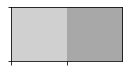

In [336]:
sns.palplot(['#D0D0D0','#A8A8A8'])

In [276]:
new_unique_main_colors = list(named_recolor.keys())

for each in new_unique_main_colors:
    print(each)
    print(taxa_per_color(each, 'PFG', tax_v2))
    print()

#CFB7A7
['Firmicutes Lachnospiraceae Anaerostipes'
 'Firmicutes Lachnospiraceae Blautia'
 'Firmicutes Lachnospiraceae Lachnoclostridium'
 'Firmicutes Lachnospiraceae Sellimonas'
 'Firmicutes Lachnospiraceae [Ruminococcus] gnavus group'
 'Firmicutes Ruminococcaceae Ruminococcus 2'
 'Firmicutes Ruminococcaceae UBA1819']

#918075
['Firmicutes Christensenellaceae Catabacter'
 'Firmicutes Christensenellaceae Christensenella'
 'Firmicutes Christensenellaceae Christensenellaceae R-7 group'
 'Firmicutes Clostridiaceae 1 Clostridium sensu stricto 1'
 'Firmicutes Clostridiaceae 1 Clostridium sensu stricto 12'
 'Firmicutes Clostridiaceae 1 Clostridium sensu stricto 13'
 'Firmicutes Clostridiaceae 1 Clostridium sensu stricto 15'
 'Firmicutes Clostridiaceae 1 Clostridium sensu stricto 16'
 'Firmicutes Clostridiaceae 1 Clostridium sensu stricto 18'
 'Firmicutes Clostridiaceae 1 Clostridium sensu stricto 2'
 'Firmicutes Clostridiaceae 1 Clostridium sensu stricto 3'
 'Firmicutes Clostridiaceae 1 Clost

/Users/granthussey/miniconda3/envs/prob/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


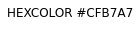

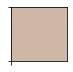

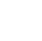

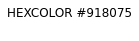

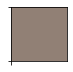

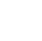

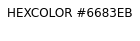

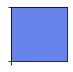

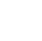

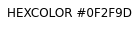

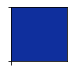

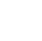

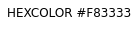

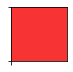

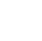

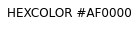

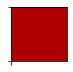

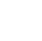

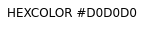

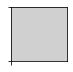

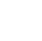

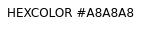

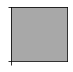

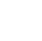

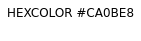

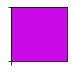

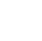

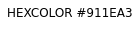

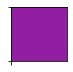

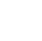

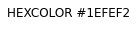

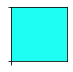

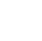

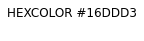

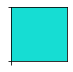

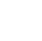

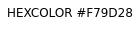

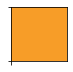

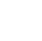

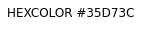

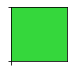

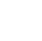

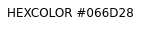

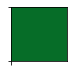

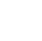

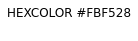

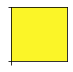

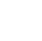

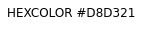

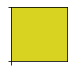

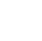

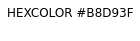

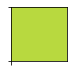

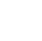

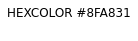

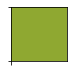

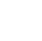

In [275]:
for each in new_unique_main_colors:
    fig, ax = plt.subplots(figsize=(0.2, 0.2))
    plt.axis("off")
    plt.title('HEXCOLOR {}'.format(each))


    sns.palplot([each])
    fig, ax = plt.subplots(figsize=(0.5, 0.5))
    plt.axis("off")



In [306]:
tax_v2

,HexColor,ColorOrder,Kingdom,Phylum,Class,Order,Family,Genus,PFG
ASV,,,,,,,,,
ASV_1,#0F2F9D,163,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,Firmicutes Lactobacillaceae Lactobacillus
ASV_10,#918075,7,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Blautia,Firmicutes Lachnospiraceae Blautia
ASV_100,#16DDD3,44,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroidetes Bacteroidaceae Bacteroides
ASV_1000,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Peptostreptococcaceae,Romboutsia,Firmicutes Peptostreptococcaceae Romboutsia
ASV_10000,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Family_Lachnospiraceae_of_unknown_Genus____ASV...,Firmicutes Lachnospiraceae Family_Lachnospirac...
...,...,...,...,...,...,...,...,...,...
ASV_9992,#F79D28,84,Bacteria,Firmicutes,Erysipelotrichia,Erysipelotrichales,Erysipelotrichaceae,Erysipelatoclostridium,Firmicutes Erysipelotrichaceae Erysipelatoclos...
ASV_9994,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Blautia,Firmicutes Lachnospiraceae Blautia
ASV_9996,#918075,21,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,[Ruminococcus] torques group,Firmicutes Lachnospiraceae [Ruminococcus] torq...


# What are the big colors? (Most common colors)

In [17]:
big_colors = tax.groupby('HexColor').size()[tax.groupby('HexColor').size() > 5]
big_colors

HexColor
#0D7E2B     232
#1CF8EC    1111
#5875DE    1518
#AFCF3C     446
#BEA89A    9948
#CA0BE8      40
#D0D0D0    2479
#EE2C2C     625
#F4EE26      67
#FBA22E     990
dtype: int64

In [ ]:
tax.groupby('HexColor')

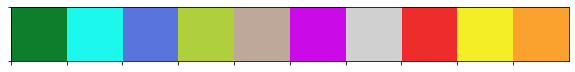

In [18]:
sns.palplot(big_colors.index.values)

# What taxa exist per color?

In [57]:
def taxa_per_color(hexcolor, taxa):
    grouped = tax[tax["HexColor"] == hexcolor].groupby(taxa).size()

    grouped_no_unknowns = grouped.reset_index()[
        grouped.reset_index()[taxa].apply(lambda v: False if "unknown" in v else True)
    ][taxa].values

    return grouped_no_unknowns

In [29]:
big_colors.index

Index(['#0D7E2B', '#1CF8EC', '#5875DE', '#AFCF3C', '#BEA89A', '#CA0BE8',
       '#D0D0D0', '#EE2C2C', '#F4EE26', '#FBA22E'],
      dtype='object', name='HexColor')

In [49]:
pfg_per_color('#1CF8EC').reset_index()[pfg_per_color('#1CF8EC').reset_index()['Family'].apply(lambda v: False if 'unknown' in v else True)]['Family'].values

array(['Bacteroidaceae', 'Bacteroidales Incertae Sedis',
       'Barnesiellaceae', 'Chitinophagaceae', 'Dysgonomonadaceae',
       'Flavobacteriaceae', 'Marinifilaceae', 'Muribaculaceae',
       'Paludibacteraceae', 'Porphyromonadaceae', 'Prevotellaceae',
       'Rikenellaceae', 'Spirosomaceae', 'Tannerellaceae',
       'Weeksellaceae'], dtype=object)

In [33]:
for color in big_colors.index:
    print(pfg_per_color(color))

Family
Enterococcaceae    232
dtype: int64
Family
Bacteroidaceae                                        355
Bacteroidales Incertae Sedis                            1
Barnesiellaceae                                        23
Chitinophagaceae                                        3
Class_Bacteroidia_of_unknown_Family____ASV_11522        1
Class_Bacteroidia_of_unknown_Family____ASV_14999        1
Class_Bacteroidia_of_unknown_Family____ASV_5197         1
Class_Bacteroidia_of_unknown_Family____ASV_64815        1
Class_Bacteroidia_of_unknown_Family____ASV_9259         1
Dysgonomonadaceae                                       8
Flavobacteriaceae                                      12
Marinifilaceae                                         50
Muribaculaceae                                         71
Order_Bacteroidales_of_unknown_Family____ASV_11836      1
Order_Bacteroidales_of_unknown_Family____ASV_11837      1
Order_Bacteroidales_of_unknown_Family____ASV_11916      1
Order_Bacteroidales_of